# Setup

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [3]:
def autocovariances(signal):
    N = len(signal)
    autocov = np.zeros(N)
    for tau in range(0,N):
        autocov[tau] = (1/N)*np.sum(signal[0:(N - tau)] @ signal[tau:N])
    return autocov


In [44]:
#Autres fonctions moins efficaces que j'avais écrites mais on utilise celle du dessus
def sample_autocovariance(signal,tau):
    gamma = 0
    for i in range (0,N-tau):
        gamma += signal[i] * signal[i+tau]
    
    return((1/N)*gamma)

def sample_autocovariances_all_tau(signal):
    N = len(signal)
    autocov = np.zeros(N)
    for tau in range(0,N):
        autocov[tau] = sample_autocovariance(signal,tau)
    return autocov

In [57]:


def periodogram(signal, fs=1): 
    n = len(signal)
    fft_vals = np.fft.fft(signal)
    DSP = (np.abs(fft_vals)**2) / n
    frequences = np.fft.fftfreq(n, 1/fs)
    #return frequences[:N//2], DSP[:N//2]
    return frequences,DSP



In [58]:
def gaussian_white_noise(size = 200):
    X = np.random.normal(0, 1, size)
    return X

In [59]:
np.random.seed(42)

sizes = [200, 500, 1000]
means = []
stds = []
nb_simu = 100
for i, N in enumerate(sizes):
    autocov = []
    for i in (range(nb_simu)):

        X = gaussian_white_noise(N)
        autocov.append(autocovariances(X))
    means.append(np.mean(autocov, axis = 0))
    stds.append(np.std(autocov, axis = 0))

    

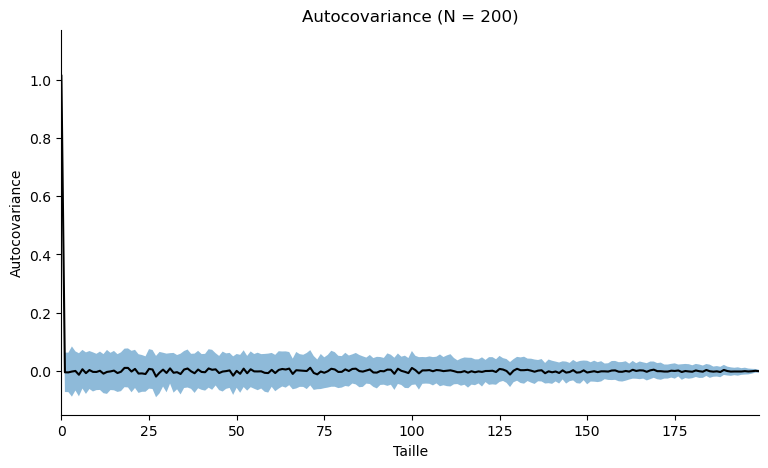

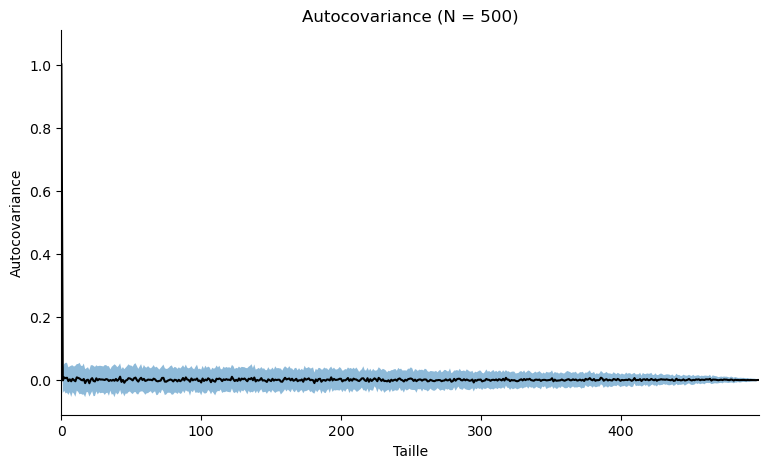

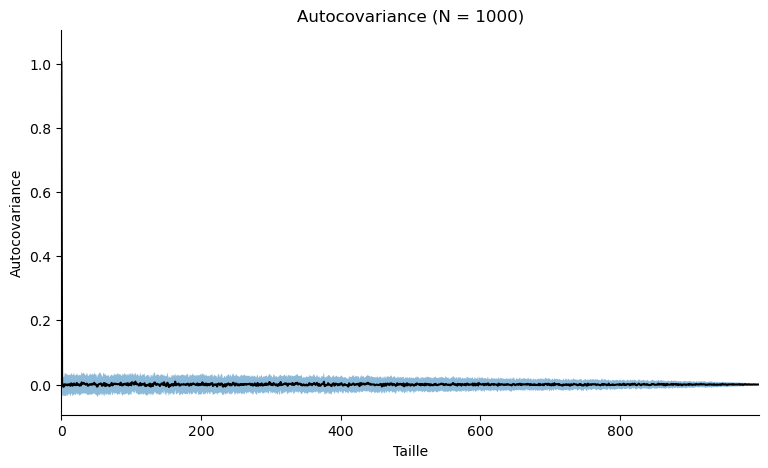

In [88]:
import seaborn as sns
np.random.seed(43)

sizes = [200, 500, 1000]
means = []
stds = []
nb_simu = 100
for i, N in enumerate(sizes):
    autocov = []
    for i in (range(nb_simu)):

        X = gaussian_white_noise(N)
        autocov.append(autocovariances(X))
    means.append(np.mean(autocov, axis = 0))
    stds.append(np.std(autocov, axis = 0))
    

import matplotlib.pyplot as plt

for j,i in enumerate(sizes):
    fig, ax = fig_ax(figsize=(9, 5))

    plt.title("Autocovariance (N = {})".format(i))
    plt.xlabel("Taille")
    plt.ylabel("Autocovariance")
    ax.plot(np.arange(0, sizes[j]), means[j], 'k-')
    ax.fill_between(np.arange(0, sizes[j]),  means[j]+stds[j], means[j]-stds[j], alpha=0.5)
    #plt.ylim(0, 0.1)
    plt.savefig("Autocovariance (N = {})".format(i))
    sns.despine()


    


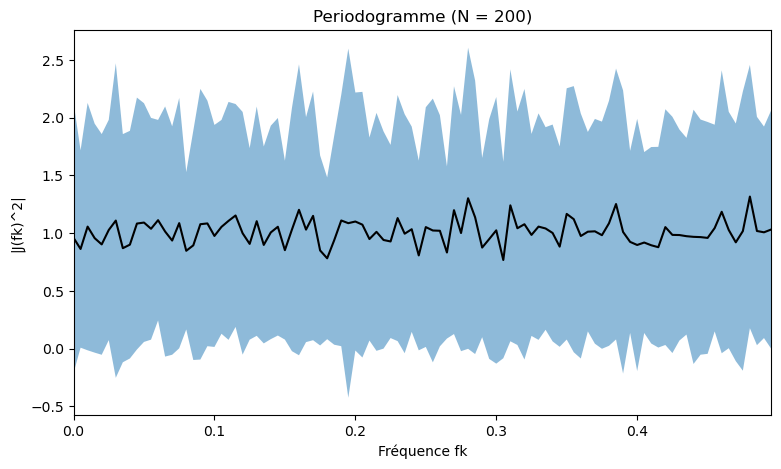

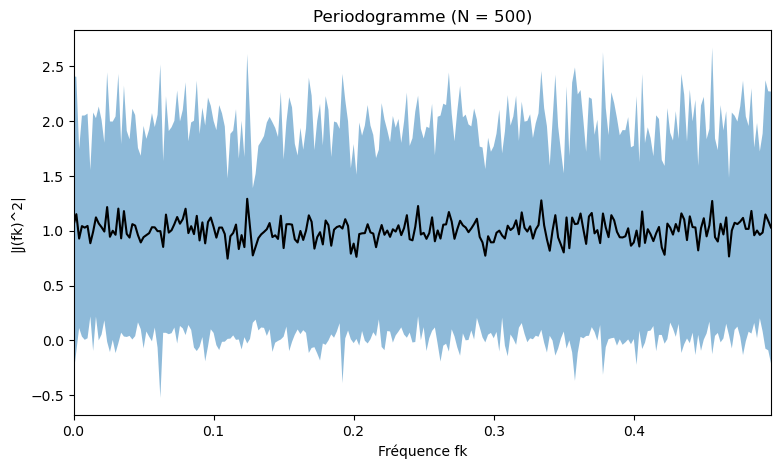

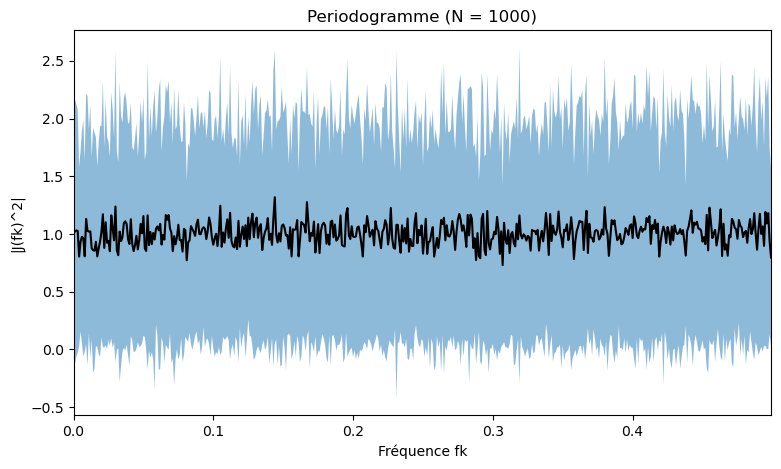

In [79]:
np.random.seed(43)

sizes = [200, 500, 1000]
means = []
stds = []
frequences = []
nb_simu = 100
for i, N in enumerate(sizes):
    list_DSP = []
    for i in (range(nb_simu)):

        X = gaussian_white_noise(N)
        f, dsp = periodogram(X)
        list_DSP.append(dsp)
    means.append(np.mean(list_DSP, axis = 0))
    stds.append(np.std(list_DSP, axis = 0))
    frequences.append(f)
    

import matplotlib.pyplot as plt
for j,i in enumerate(sizes):
    #plt.plot(np.arange(0, sizes[2]), means[2])
    fig, ax = fig_ax(figsize=(9, 5))
    plt.title("Periodogramme (N = {})".format(i))

    indices = np.where(frequences[j] >= 0)
    frequences[j] = frequences[j][indices]
    means[j] = means[j][indices]
    stds[j] = stds[j][indices]
    ax.plot(frequences[j], means[j], 'k-')
    ax.fill_between(frequences[j],  means[j]+stds[j], means[j]-stds[j], alpha=0.5)
    plt.xlabel("Fréquence fk")
    plt.ylabel("|J(fk)^2|")
    plt.savefig("Periodogramme (N = {})".format(i))
    #sns.despine()


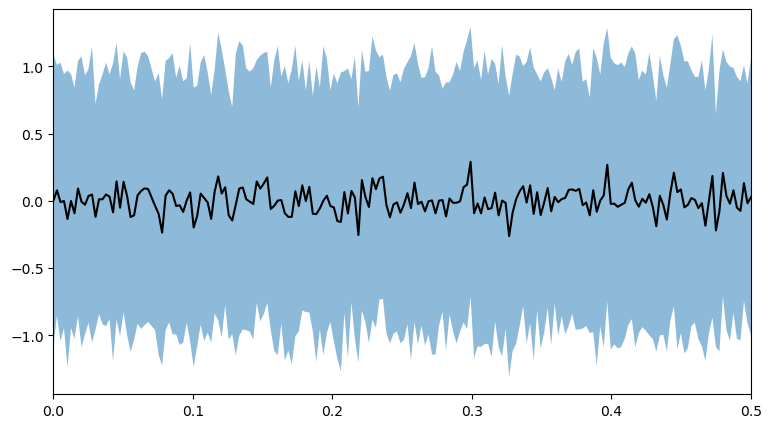

In [63]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
freqs = np.linspace(0, 0.5, 200)
##


fig, ax = fig_ax(figsize=(9, 5))

avg = periodograms.mean(axis=0)
std = periodograms.std(axis=0)
ax.plot(freqs, avg, 'k-')
ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


## Question 9

In [80]:
def Bartlett(signal, K=5):
    list_DSP=[]
    for i in range(K):
        section = signal[int(i*len(signal)/K) : int((i+1)*len(signal)/K)]
        frequencies, DSP = periodogram(section, fs=1)
        list_DSP.append(DSP)
    return(frequencies,np.mean(list_DSP,axis=0))

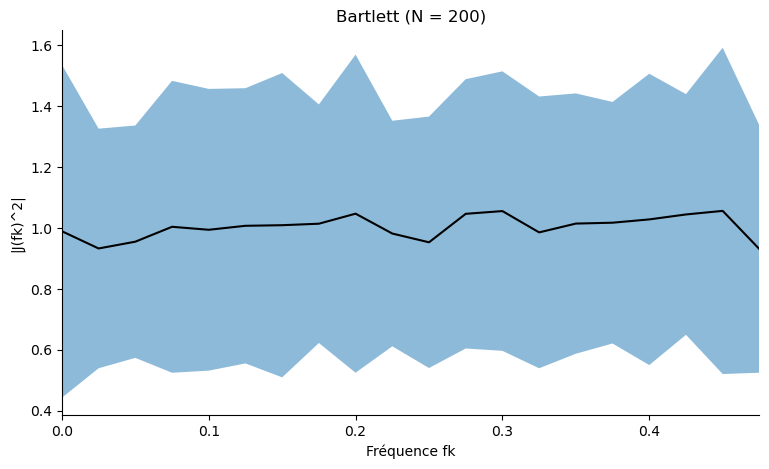

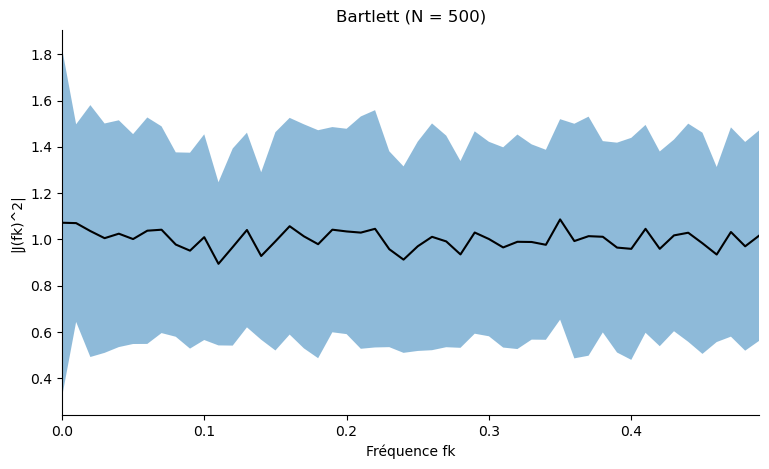

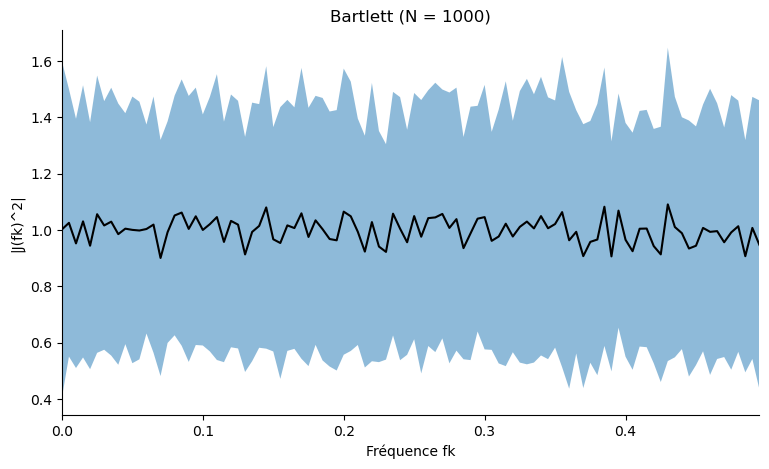

In [83]:
np.random.seed(42)

sizes = [200, 500, 1000]
means = []
stds = []
frequences = []
nb_simu = 100
for i, N in enumerate(sizes):
    list_DSP = []
    for i in (range(nb_simu)):

        X = gaussian_white_noise(N)
        f, dsp = Bartlett(X)
        list_DSP.append(dsp)
    means.append(np.mean(list_DSP, axis = 0))
    stds.append(np.std(list_DSP, axis = 0))
    frequences.append(f)
    

import matplotlib.pyplot as plt

for j,i in enumerate(sizes):
    fig, ax = fig_ax(figsize=(9, 5))

    plt.title("Bartlett (N = {})".format(i))
    #plt.plot(np.arange(0, sizes[2]), means[2])
    #sns.scatterplot(x=frequences[j], y=means[j])
    indices = np.where(frequences[j] >= 0)
    frequences[j] = frequences[j][indices]
    means[j] = means[j][indices]
    stds[j] = stds[j][indices]
    #plt.ylim(0, 0.1)
    #plt.fill_between(np.arange(0, sizes[2]), means[2]-stds[2], means[2]-stds[2], alpha=0.5)
    ax.plot(frequences[j], means[j], 'k-')
    ax.fill_between(frequences[j],  means[j]+stds[j], means[j]-stds[j], alpha=0.5)
    plt.xlabel("Fréquence fk")
    plt.ylabel("|J(fk)^2|")
    plt.savefig("Barlett (N = {})".format(i))
    sns.despine()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [3]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(list(signal[start:end]))
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(list(signal[start:end]))
        y_test.append(label)

## Question 10

In [4]:
from tslearn.utils import to_time_series_dataset
X_train = to_time_series_dataset(X_train)
X_test = to_time_series_dataset(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

/home/danube/anaconda3/envs/TimeSeries/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [27]:
from tslearn.neighbors import KNeighborsTimeSeries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from tqdm import tqdm
MAX_N = 50
f1_scores = []
f1_stds = []
rk = KFold(n_splits = 5, shuffle = True)

    
for i in tqdm(range(1, MAX_N, 2)):
    knn = KNeighborsTimeSeries(n_neighbors = i)
    scores_i = []
    for train,test in rk.split(X_train):
        train_x_kf = X_train[train]
        test_x_kf = X_train[test]
        train_y_kf = y_train[train]
        test_y_kf = y_train[test]
        knn.fit(train_x_kf)
        neighbors = knn.kneighbors(test_x_kf)
        y_neighbors = y_train[neighbors[1]]
        y_predicted = np.where(np.sum(y_neighbors, axis = 1)<= i//2, [0], [1])
        scores_i.append(f1_score(y_predicted, test_y_kf))
    f1_stds.append(np.std(scores_i))
    scores_i = np.mean(scores_i)
    f1_scores.append(scores_i)
        

  4%|███▎                                                                                | 1/25 [00:04<01:41,  4.21s/it]

[0.4375, 0.48484848484848486, 0.6875, 0.5517241379310345, 0.5806451612903226]


  8%|██████▋                                                                             | 2/25 [00:08<01:33,  4.07s/it]

[0.6666666666666666, 0.6666666666666666, 0.38461538461538464, 0.6285714285714286, 0.4]


 12%|██████████                                                                          | 3/25 [00:12<01:29,  4.05s/it]

[0.6428571428571429, 0.6470588235294118, 0.45161290322580644, 0.5625, 0.4166666666666667]


 16%|█████████████▍                                                                      | 4/25 [00:16<01:24,  4.00s/it]

[0.7058823529411765, 0.42424242424242425, 0.3333333333333333, 0.5625, 0.3333333333333333]


 20%|████████████████▊                                                                   | 5/25 [00:20<01:20,  4.01s/it]

[0.4444444444444444, 0.5161290322580645, 0.3448275862068966, 0.5789473684210527, 0.35714285714285715]


 24%|████████████████████▏                                                               | 6/25 [00:24<01:16,  4.01s/it]

[0.5, 0.6, 0.375, 0.24, 0.19047619047619047]


 28%|███████████████████████▌                                                            | 7/25 [00:28<01:12,  4.05s/it]

[0.5714285714285714, 0.5, 0.25, 0.2608695652173913, 0.6060606060606061]


 32%|██████████████████████████▉                                                         | 8/25 [00:32<01:10,  4.14s/it]

[0.72, 0.3870967741935484, 0.30303030303030304, 0.5454545454545454, 0.6206896551724138]


 36%|██████████████████████████████▏                                                     | 9/25 [00:36<01:06,  4.13s/it]

[0.3333333333333333, 0.5161290322580645, 0.34782608695652173, 0.4666666666666667, 0.375]


 40%|█████████████████████████████████▏                                                 | 10/25 [00:40<01:01,  4.09s/it]

[0.56, 0.3870967741935484, 0.21428571428571427, 0.6666666666666666, 0.4666666666666667]


 44%|████████████████████████████████████▌                                              | 11/25 [00:44<00:56,  4.04s/it]

[0.5142857142857142, 0.21428571428571427, 0.38461538461538464, 0.5384615384615384, 0.4666666666666667]


 48%|███████████████████████████████████████▊                                           | 12/25 [00:48<00:53,  4.11s/it]

[0.3333333333333333, 0.45161290322580644, 0.6451612903225806, 0.5333333333333333, 0.18181818181818182]


 52%|███████████████████████████████████████████▏                                       | 13/25 [00:53<00:50,  4.17s/it]

[0.4166666666666667, 0.2962962962962963, 0.3076923076923077, 0.42857142857142855, 0.631578947368421]


 56%|██████████████████████████████████████████████▍                                    | 14/25 [00:57<00:47,  4.28s/it]

[0.47058823529411764, 0.3448275862068966, 0.38461538461538464, 0.6875, 0.5]


 60%|█████████████████████████████████████████████████▊                                 | 15/25 [01:02<00:42,  4.28s/it]

[0.5454545454545454, 0.27586206896551724, 0.5161290322580645, 0.5185185185185185, 0.37037037037037035]


 64%|█████████████████████████████████████████████████████                              | 16/25 [01:06<00:37,  4.18s/it]

[0.7142857142857143, 0.2962962962962963, 0.4666666666666667, 0.3076923076923077, 0.34782608695652173]


 68%|████████████████████████████████████████████████████████▍                          | 17/25 [01:10<00:33,  4.16s/it]

[0.45714285714285713, 0.3076923076923077, 0.24, 0.5161290322580645, 0.5714285714285714]


 72%|███████████████████████████████████████████████████████████▊                       | 18/25 [01:14<00:29,  4.17s/it]

[0.41379310344827586, 0.5333333333333333, 0.2222222222222222, 0.45161290322580644, 0.46153846153846156]


 76%|███████████████████████████████████████████████████████████████                    | 19/25 [01:18<00:25,  4.28s/it]

[0.42857142857142855, 0.48, 0.4, 0.5454545454545454, 0.42857142857142855]


 80%|██████████████████████████████████████████████████████████████████▍                | 20/25 [01:23<00:22,  4.42s/it]

[0.5517241379310345, 0.41379310344827586, 0.38461538461538464, 0.4375, 0.4827586206896552]


 84%|█████████████████████████████████████████████████████████████████████▋             | 21/25 [01:27<00:17,  4.40s/it]

[0.631578947368421, 0.3333333333333333, 0.38461538461538464, 0.4, 0.38461538461538464]


 88%|█████████████████████████████████████████████████████████████████████████          | 22/25 [01:32<00:13,  4.36s/it]

[0.5555555555555556, 0.41379310344827586, 0.3448275862068966, 0.5185185185185185, 0.25]


 92%|████████████████████████████████████████████████████████████████████████████▎      | 23/25 [01:36<00:08,  4.39s/it]

[0.5185185185185185, 0.36363636363636365, 0.3333333333333333, 0.4827586206896552, 0.5185185185185185]


 96%|███████████████████████████████████████████████████████████████████████████████▋   | 24/25 [01:41<00:04,  4.38s/it]

[0.38461538461538464, 0.5625, 0.38461538461538464, 0.38461538461538464, 0.5]


100%|███████████████████████████████████████████████████████████████████████████████████| 25/25 [01:45<00:00,  4.21s/it]

[0.3333333333333333, 0.2857142857142857, 0.625, 0.24, 0.5263157894736842]


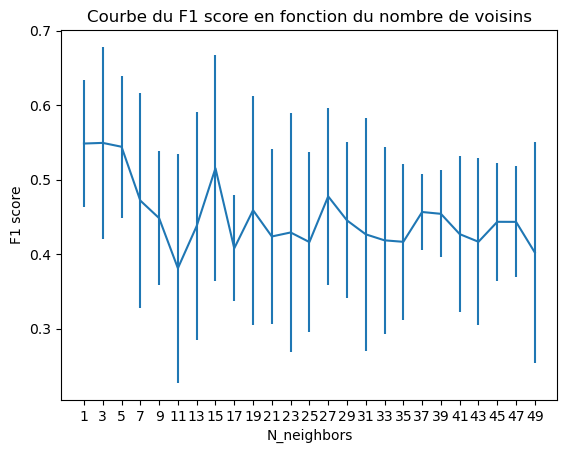

In [28]:
plt.xlabel("N_neighbors")
plt.ylabel("F1 score")
plt.title("Courbe du F1 score en fonction du nombre de voisins")
neighbors = [i for i in range(1, MAX_N, 2)]
plt.xticks(neighbors)
plt.errorbar(neighbors, f1_scores, f1_stds)
plt.savefig("f1_score.png")
plt.show()

In [30]:
ind_max = np.argmax(f1_scores)

n_max = neighbors[ind_max]
score = f1_scores[ind_max]
std = f1_stds[ind_max]
print("Nombre de voisins optimal : ", n_max, " pour un f1score de ", score, " et une déviation standard de ", std )

Nombre de voisins optimal :  3  pour un f1score de  0.5493040293040292  et une déviation standard de  0.12903126810184126


## Question 11

In [31]:
knn = KNeighborsTimeSeries(n_neighbors = 3)
knn.fit(X_train)

def predict(knn, y_train,  X):
    neighbors = knn.kneighbors(X)
    y_neighbors = y_train[neighbors[1]]
    y_predicted = np.where(np.sum(y_neighbors, axis = 1)<= len(neighbors[1][0])//2, [0], [1])
    return y_predicted

In [32]:
y_predicted = predict(knn, y_train, X_test)

In [33]:
faux_negatifs = np.where(y_test - y_predicted == - 1)[0]
faux_positifs = np.where(y_test - y_predicted == 1)[0]

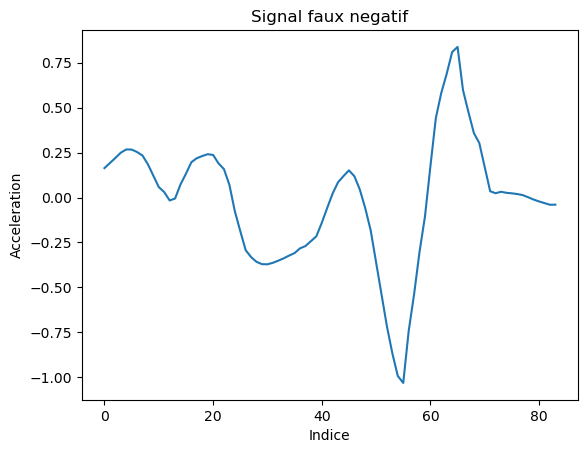

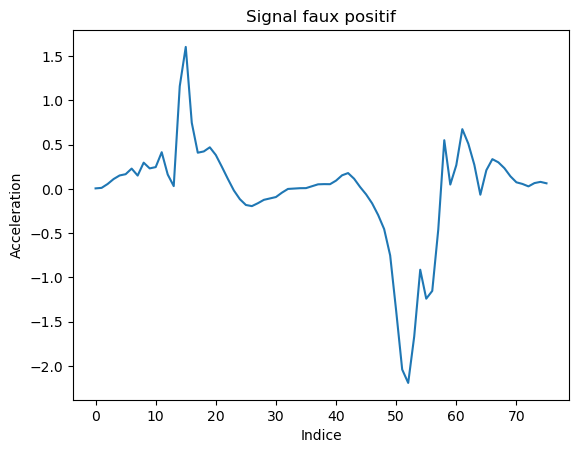

In [35]:
import random
random.seed(41)
index_negatif = random.randint(0, len(faux_negatifs))
index_positif = random.randint(0, len(faux_positifs))
plt.figure()
plt.plot([i for i in range(0, len(X_test[index_negatif]))], X_test[index_negatif])
plt.title("Signal faux negatif")
plt.xlabel("Indice")
plt.ylabel("Acceleration")
plt.savefig("faux_negatif.png")
plt.figure()
plt.plot([i for i in range(0, len(X_test[index_positif]))], X_test[index_positif])
plt.title("Signal faux positif")
plt.xlabel("Indice")
plt.ylabel("Acceleration")
plt.savefig("faux_positif.png")
plt.show()